# Ultrafast electron cooling in an expanding ultracold plasma

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Ultrafast_EC/input_files/uec.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Ultrafast_EC/Ultrafast_EC_Validation.ipynb).


## Ultracold Microplasma

Let us observe the [**Ultrafast electron cooling in an expanding ultracold plasma**](https://doi.org/10.1038/s41467-020-20815-8). Here, a cloud of neutral atoms is trapped and cooled to quantum degeneracy at ~nK temperatures. The Bose-Einstein condensate (BEC) with a peak number density of $n \sim 2 \times 10^{20}\, \textrm{m}^{-3}$ is then rapidly ionized by a femtosecond laser pulse of $511\, \textrm{nm}$ wavelength and $215\, \textrm{fs}$ duration so that $N \sim 4000$ ions and electrons immediately emerge after two-photon ionization. The excess energy of $0.68\, \textrm{eV}$ is distributed between ions and electrons leading to an initial ion temperature of $T_{\rm i} \sim 33\, \textrm{mK}$ and fast escaping electrons of $T_e \sim 5250\, \textrm{K}$.

The ions are initially strongly coupled as the temperture is very small compared to the Coulomb energy of the dense, ionized BEC:

$$ \Gamma_{\rm i} = \frac{(e)^2}{4\pi \varepsilon_0 a_{\rm ws}} \frac{1}{k_B T_{\rm i}} = 4800 $$

where $T_{\rm i}$ is the ion temperature, and $a_{\rm ws} = [3 / (4\pi n)]^{1/3}$ is the Wigner-Seitz radius defined by the number density $n$.

The high density also leads to ultrafast dynamics as the inverse electron plasma frequency is given by:

$$ \nu^{-1}_{\rm p,e} = 2 \pi \sqrt{\frac{m_{\rm e} \varepsilon_0}{n e^2}} \sim 8\, \textrm{ps} $$

## Initialization

We start by importing the usual libraries and creating a path to the input file of our simulation.

In [1]:
%pylab
%matplotlib inline
import os
import pandas as pd

from sarkas.processes import PreProcess, Simulation, PostProcess

plt.style.use('../../../sarkas/mplstyles/MSUstyle.mplstyle')
input_file = os.path.join('input_files', 'uec.yaml')

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Simulation

Let us start the simulation which takes ~30 minutes on 2021's computer.

In [2]:
# Initialize the Simulation class
sim = Simulation(input_file)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics suite for non-ideal plasmas.


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! WARNING !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Use the PP method with care for pure Coulomb interactions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                   Simulation           

0it [00:00, ?it/s]


Equilibration Time: 0 sec 31 msec 687 usec 913 nsec

------------- Production -------------


  0%|          | 0/600 [00:00<?, ?it/s]


Production Time: 0 hrs 31 min 2 sec

Total Time: 0 hrs 31 min 3 sec


## PostProcessing

Now let's have a look at the results and run the PostProcessing




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  UEC_4000
Job directory:  Simulations/UEC_4000
PostProcessing directory: 
 Simulations/UEC_4000/PostProcessing

Equilibration dumps directory:  Simulations/UEC_4000/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/UEC_4000/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/UEC_4000/Simulation/Equilibration/EquilibrationEnergy_UEC_4000.csv
Production Thermodynamics file: 
 Simulations/UEC_4000/Simulation/Production/ProductionEnergy_UEC_4000.csv


==================== Radial Distribution Function ==================== 

Data saved in: 
 Simulations/UEC_4000/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_UEC_4000.csv
Da

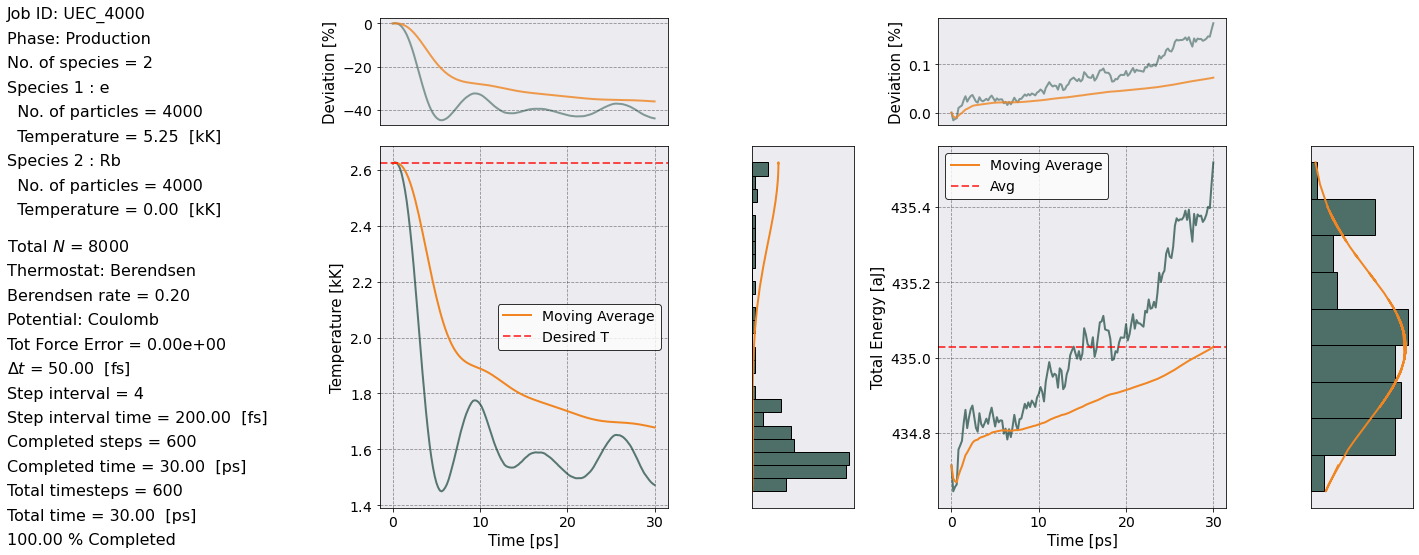

In [3]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)
# Calculate observables
postproc.run()

Let us have a closer look at the energy evolution over time which we can extract from our Sarkas simulation into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [4]:
# Rename the Thermodynamics class for convenience
E = postproc.therm
# Setup its attributes
E.setup(postproc.parameters)
# Grab the data
E.parse()

# Results dataframe
Temp_vel_data = pd.DataFrame()
# Time
Temp_vel_data['Time'] = E.dataframe["Time"] * 1e12 # scale by picosec
# Total energies
eVpp = 1 / (np.abs(E.qe) * postproc.species[0].num) # scale by eV per particle
Temp_vel_data['Total Energy'] = E.dataframe["Total Energy"] * eVpp
Temp_vel_data['Total Kinetic Energy'] = E.dataframe["Total Kinetic Energy"] * eVpp
Temp_vel_data['Potential Energy'] = E.dataframe["Potential Energy"] * eVpp
# Kinetic energies
Temp_vel_data['e Kinetic Energy'] = E.dataframe[' '.join([postproc.species[0].name, 'Kinetic Energy'])] * eVpp
Temp_vel_data['Ion Kinetic Energy'] = E.dataframe[' '.join([postproc.species[1].name, 'Kinetic Energy'])] * eVpp
# Potential energies
Temp_vel_data['ee Potential Energy'] = E.dataframe[' '.join([postproc.species[0].name, 'Potential Energy'])] * eVpp
Temp_vel_data['IonIon Potential Energy'] = E.dataframe[' '.join([postproc.species[1].name, 'Potential Energy'])] * eVpp
Temp_vel_data['eIon Potential Energy'] = Temp_vel_data['Potential Energy'] \
    - Temp_vel_data['ee Potential Energy'] - Temp_vel_data['IonIon Potential Energy']

It is now time to plot and compare. For this tutorial we grabbed data from Fig. 4f of this [paper](https://doi.org/10.1038/s41467-020-20815-8). The data was obtained using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/) and saved into the files ``Ee.csv``, ``Ei.csv`` and ``Ekinp.csv`` in the folder ``uec_data``, reflecting the ultrafast energy evolution for the electrons, ions and plasma electrons, respectively.

We will compare the results with our simulation. The ion energy $E_{\rm i}$ is composed of $E_{\rm i} = E^{\rm kin}_{\rm i} + E^{\rm pot}_{\rm ii} + 0.5 E^{\rm pot}_{\rm ei}$ while the electron energy $E_{\rm e}$ is composed of $E_{\rm e} = E^{\rm kin}_{\rm e} + E^{\rm pot}_{\rm ee} + 0.5 E^{\rm pot}_{\rm ei}$ so that the inter-species potential energy $E^{\rm pot}_{\rm ei}$ is equally shared by the electrons and ions.

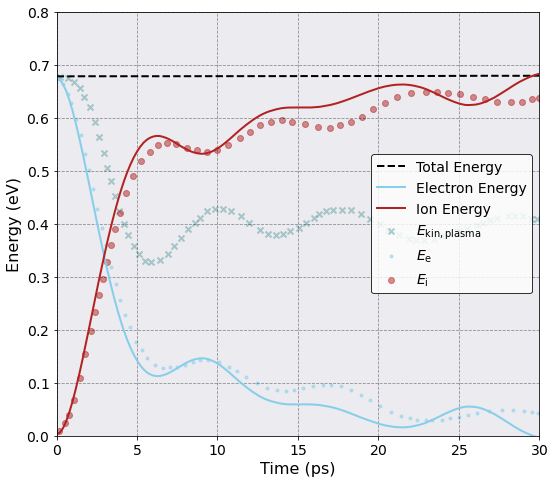

In [5]:
# Read paper data
Ee = pd.read_csv(os.path.join('uec_data/', 'Ee.csv'), names=['Time', 'Energy'])
Ei = pd.read_csv(os.path.join('uec_data/', 'Ei.csv'), names=['Time', 'Energy'])
Ekinp = pd.read_csv(os.path.join('uec_data/', 'Ekinp.csv'), names=['Time', 'Energy'])

# Plot
fig_energy, (ax_etot) = plt.subplots(1, 1, figsize=(10, 7))

# Simulation data
plt.plot(Temp_vel_data['Time'], Temp_vel_data['Total Energy'], linestyle='--', color='black', label='Total Energy')
ion_energy = Temp_vel_data['Ion Kinetic Energy'] + Temp_vel_data['IonIon Potential Energy'] \
             + 0.5*Temp_vel_data['eIon Potential Energy']
electron_energy = Temp_vel_data['e Kinetic Energy'] + Temp_vel_data['ee Potential Energy'] \
             + 0.5*Temp_vel_data['eIon Potential Energy']
plt.plot(Temp_vel_data['Time'], electron_energy, linestyle='-', color='skyblue', label='Electron Energy')
plt.plot(Temp_vel_data['Time'], ion_energy, linestyle='-', color='firebrick', label='Ion Energy')

# Paper data
plt.scatter(Ekinp['Time'], Ekinp['Energy'], marker='x', color='cadetblue', alpha=0.5, label=r'$E_{\rm kin,plasma}$')
plt.scatter(Ee['Time'], Ee['Energy'], marker='.', color='skyblue', alpha=0.5, label=r'$E_{\rm e}$')
plt.scatter(Ei['Time'], Ei['Energy'], marker='o', color='firebrick', alpha=0.5, label=r'$E_{\rm i}$')

plt.xlim((0, 30))
plt.ylim((0, 0.8))
ax_etot.legend()
ax_etot.set(xlabel =r'Time (ps)', ylabel = 'Energy (eV)')
fig_energy.tight_layout()
fig_energy.savefig(os.path.join(postproc.io.postprocessing_dir,'Energy_Plot.png'))

Nice! Sarkas accurately reproduces the ultrafast electron cooling. Minor descrepancies in the amplitude and electron plasma frequency are attributed to the initial particle distribution which is an elongated box in sarkas and a cylinder in the original publication.